In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/election2024.csv')

In [3]:
dataset.head()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


In [4]:
dataset.shape

(1600, 16)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             692 non-null    object 
 14  company_type         879 non-null    object 
 15  weight1              1600 non-null   f

In [6]:
dataset.describe()

,age,weight1
count,1600.000000,1600.000000
mean,49.936250,1.000000
std,16.901797,0.327084
min,18.000000,0.468226
25%,37.000000,0.772224
50%,49.000000,0.921724
75%,64.000000,1.158913
max,90.000000,2.515072


In [7]:
dataset.isnull().sum()

id                       0
sex                      0
age                      0
federal_district         0
type_of_city             0
knows_election_date      0
will_vote                0
candidate                0
television_usage         0
internet_usage           0
education                0
income                   0
employment               0
job_type               908
company_type           721
weight1                  0
dtype: int64

In [8]:
dataset.isna().sum()

id                       0
sex                      0
age                      0
federal_district         0
type_of_city             0
knows_election_date      0
will_vote                0
candidate                0
television_usage         0
internet_usage           0
education                0
income                   0
employment               0
job_type               908
company_type           721
weight1                  0
dtype: int64

In [9]:
dataset.duplicated().sum()

0

In [10]:
(dataset.isnull().sum() / len(dataset.index))*100

id                      0.0000
sex                     0.0000
age                     0.0000
federal_district        0.0000
type_of_city            0.0000
knows_election_date     0.0000
will_vote               0.0000
candidate               0.0000
television_usage        0.0000
internet_usage          0.0000
education               0.0000
income                  0.0000
employment              0.0000
job_type               56.7500
company_type           45.0625
weight1                 0.0000
dtype: float64

In [11]:
dataset.drop(['job_type','company_type'],axis = 1, inplace=True)

In [12]:
dataset.head()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,1.967015


<Axes: xlabel='age', ylabel='Count'>

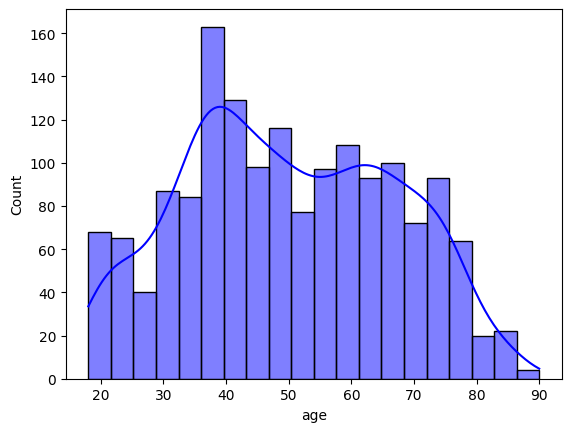

In [13]:
sns.histplot(dataset['age'], kde = True, bins = 20, color = 'blue')

<Axes: ylabel='age'>

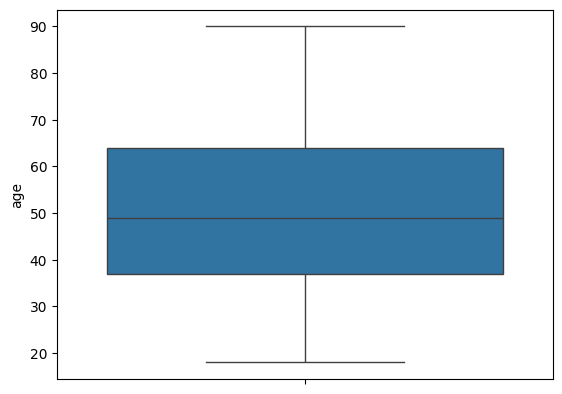

In [14]:
sns.boxplot(dataset['age'])

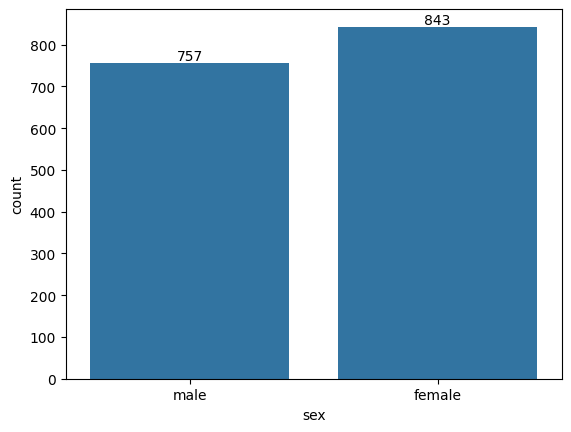

In [15]:
ax = sns.countplot(x='sex',data=dataset)

for bars in ax.containers:
    ax.bar_label(bars)

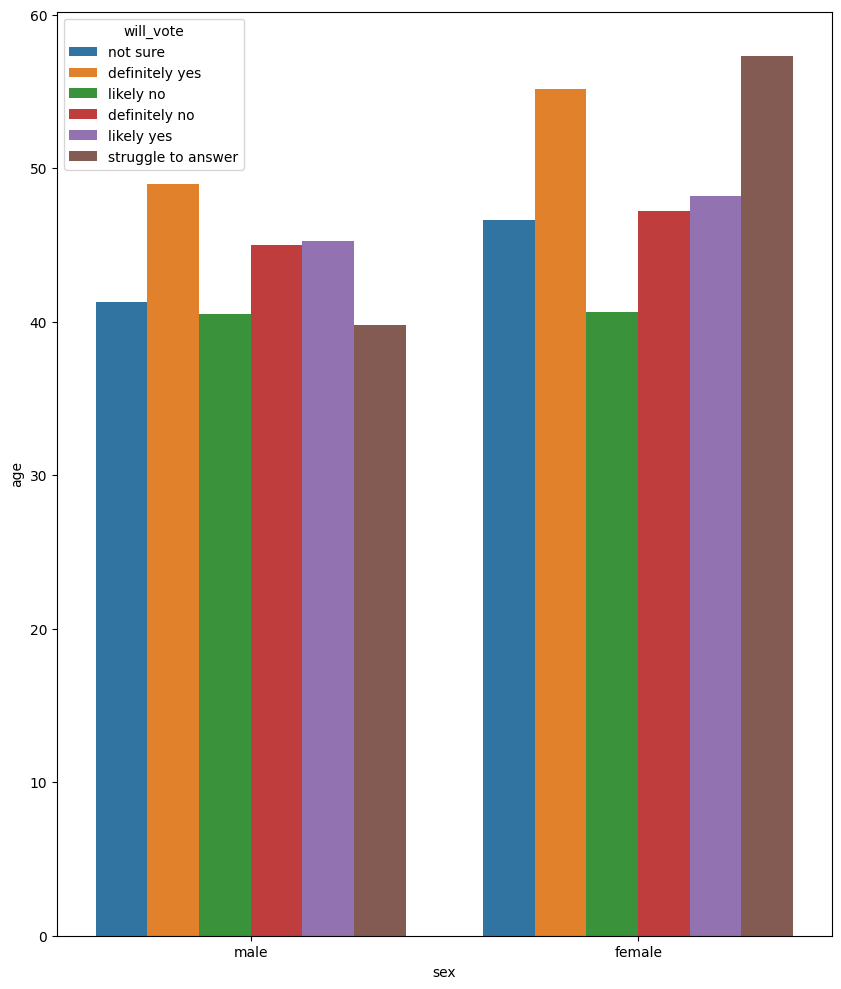

In [16]:
plt.figure(figsize=(10,12))
sns.barplot(x = 'sex',y='age', hue = 'will_vote',data=dataset, errorbar=None)
plt.show()


In [17]:
dataset.columns

Index(['id', 'sex', 'age', 'federal_district', 'type_of_city',
       'knows_election_date', 'will_vote', 'candidate', 'television_usage',
       'internet_usage', 'education', 'income', 'employment', 'weight1'],
      dtype='object')

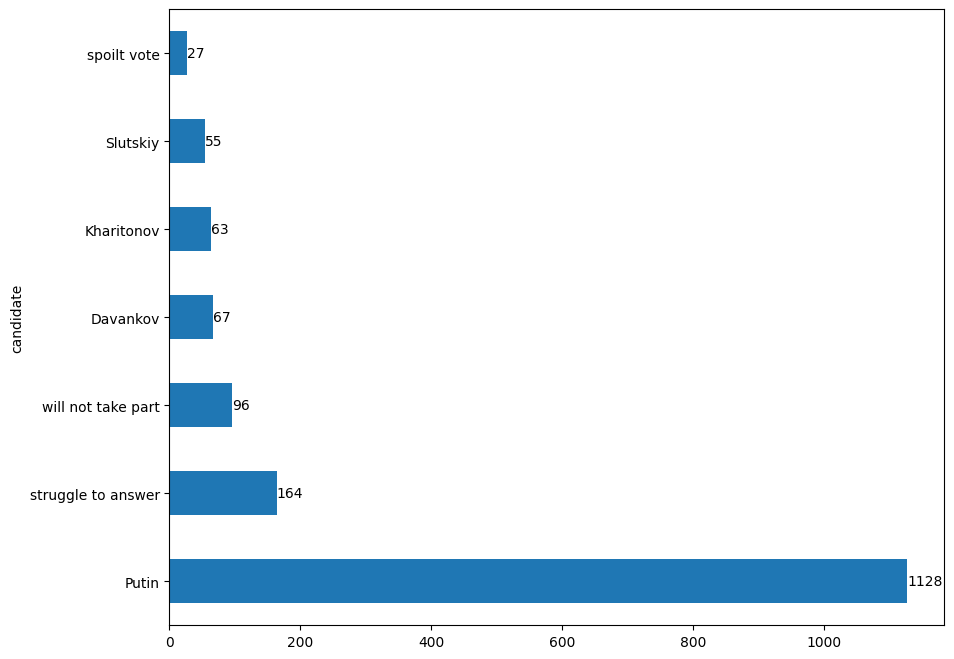

In [18]:
plt.figure(figsize=(10,8))
ax0 = dataset['candidate'].value_counts().plot.barh()

for bars in ax0.containers:
    ax0.bar_label(bars)

In [19]:
dataset['knows_election_date'].value_counts()

knows_election_date
named correct date       1361
not sure or no answer     165
named correct year         55
wrong answer               19
Name: count, dtype: int64

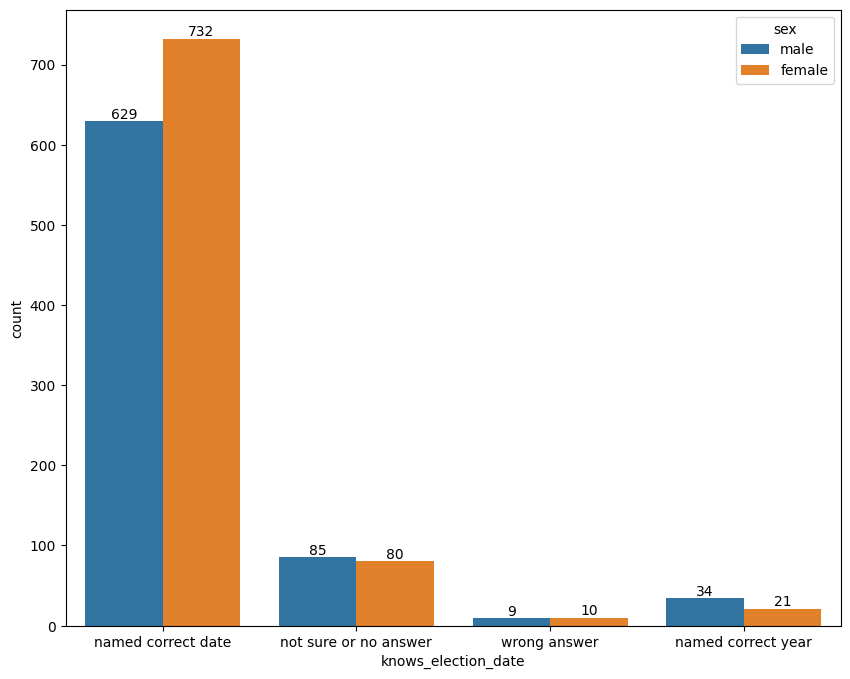

In [20]:
plt.figure(figsize=(10,8))
ax2= sns.countplot(x='knows_election_date', hue = 'sex',data=dataset)

for bars in ax2.containers:
    ax2.bar_label(bars)

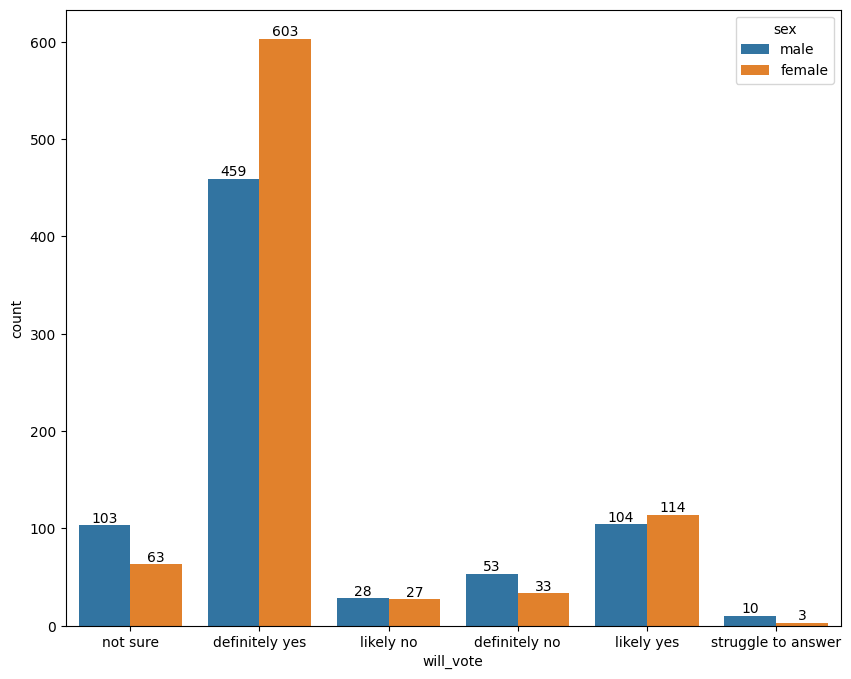

In [21]:
plt.figure(figsize=(10,8))
ax3= sns.countplot(x='will_vote', hue = 'sex',data=dataset)

for bars in ax3.containers:
    ax3.bar_label(bars)

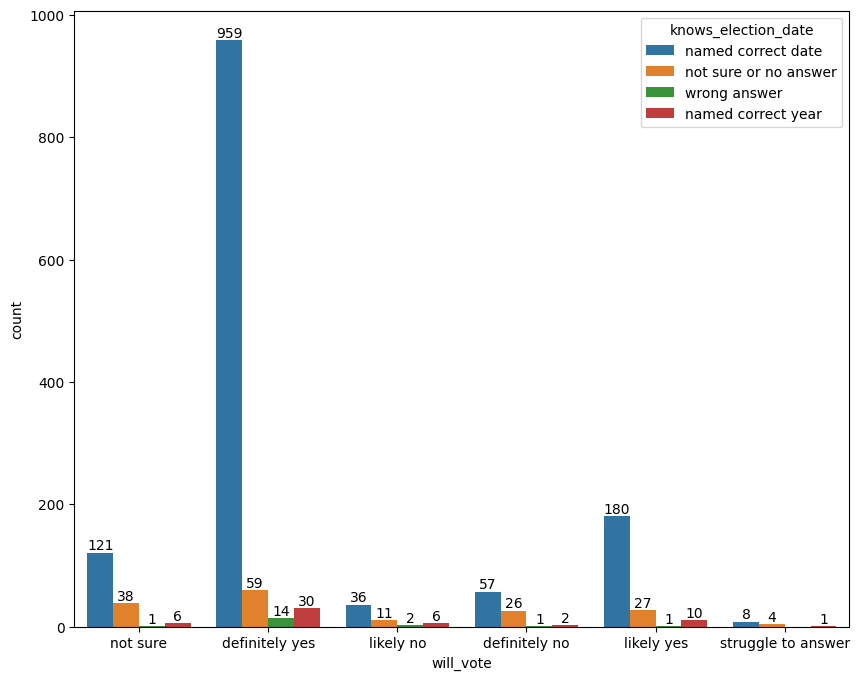

In [22]:
plt.figure(figsize=(10,8))
ax4= sns.countplot(x='will_vote', hue = 'knows_election_date',data=dataset)

for bars in ax4.containers:
    ax4.bar_label(bars)

In [23]:
dataset.columns


Index(['id', 'sex', 'age', 'federal_district', 'type_of_city',
       'knows_election_date', 'will_vote', 'candidate', 'television_usage',
       'internet_usage', 'education', 'income', 'employment', 'weight1'],
      dtype='object')

In [24]:
dataset['education'].unique()

array(['incomplete school education', 'college', 'bachelor degree',
       'school', 'academic degree', 'no school education'], dtype=object)

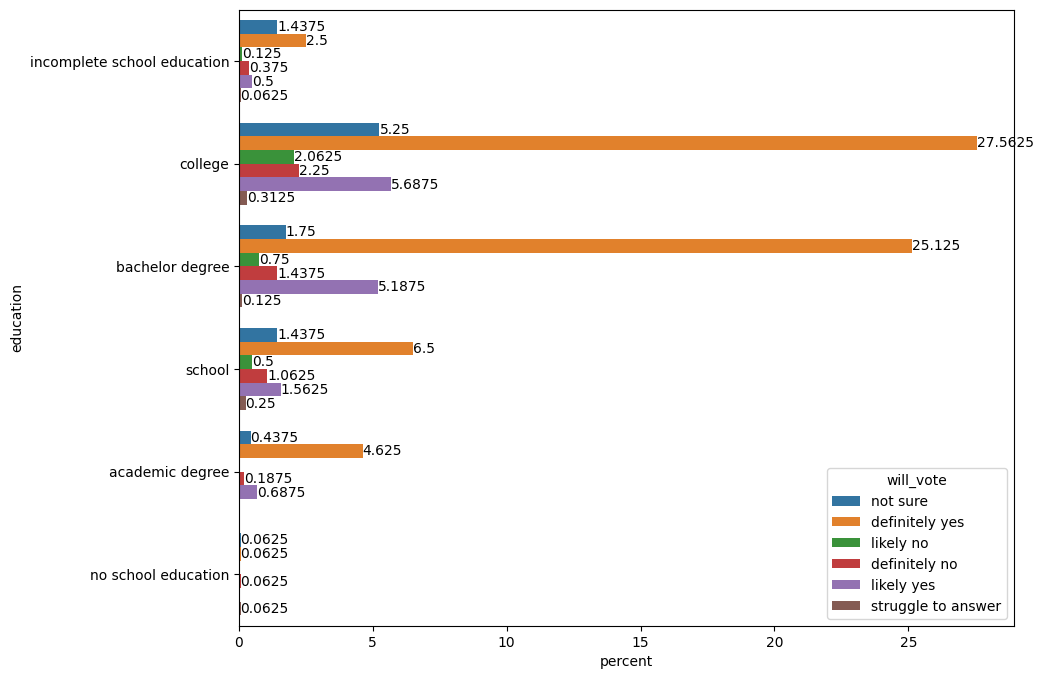

In [25]:
plt.figure(figsize=(10,8))
ax5 = sns.countplot(y='education', hue = 'will_vote',data=dataset, stat = 'percent')

for bars in ax5.containers:
    ax5.bar_label(bars)

In [26]:
new_col = [feature for feature in dataset.columns if feature in ['television_usage','internet_usage']]
new_col

['television_usage', 'internet_usage']

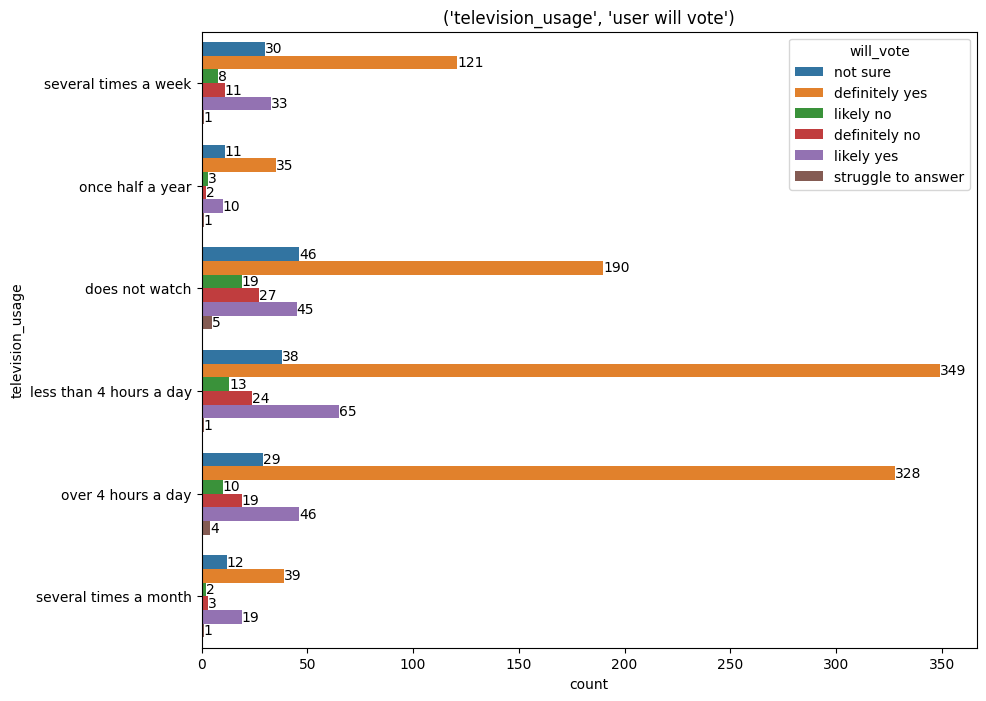

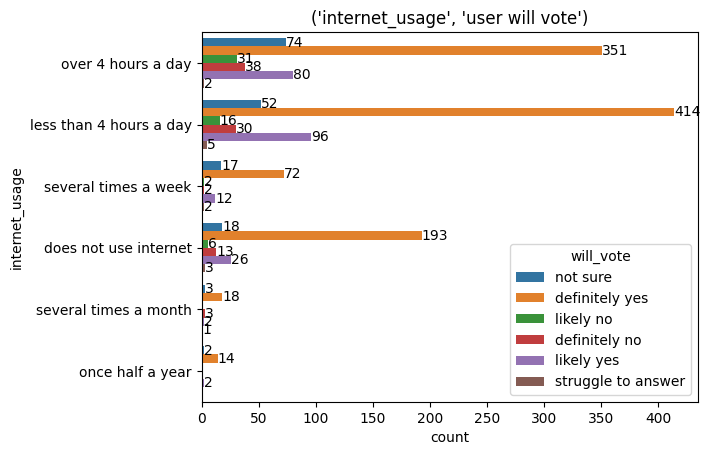

In [27]:
plt.figure(figsize=(10,8))
for feature in new_col:
    df2 = dataset.copy()
    ax6 = sns.countplot(y=feature ,hue="will_vote", data=df2)
    plt.title((feature,'user will vote' ))
    for bars in ax6.containers:
        ax6.bar_label(bars)
    plt.show()

In [28]:
sec_new_col = [feature for feature in dataset.columns if feature in ['employment','income']]
sec_new_col

['income', 'employment']

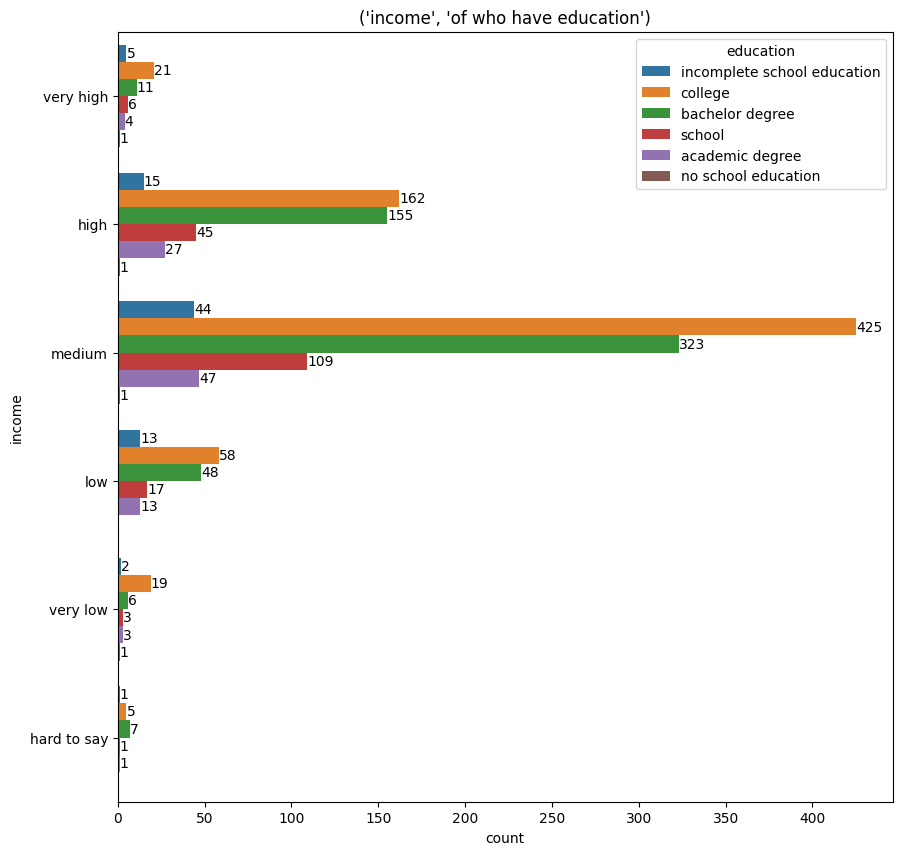

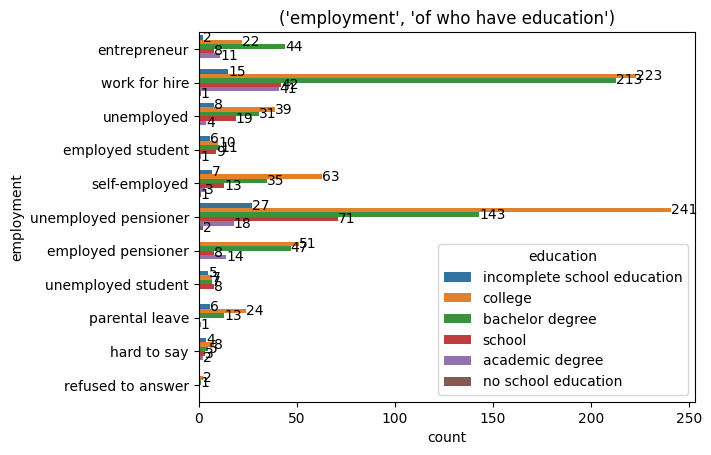

In [29]:
plt.figure(figsize=(10,10))
for feature in sec_new_col:
    df2 = dataset.copy()
    ax7 = sns.countplot(y=feature ,hue="education", data=df2)
    plt.title((feature,'of who have education'))
    for bars in ax7.containers:
        ax7.bar_label(bars)
    plt.show()

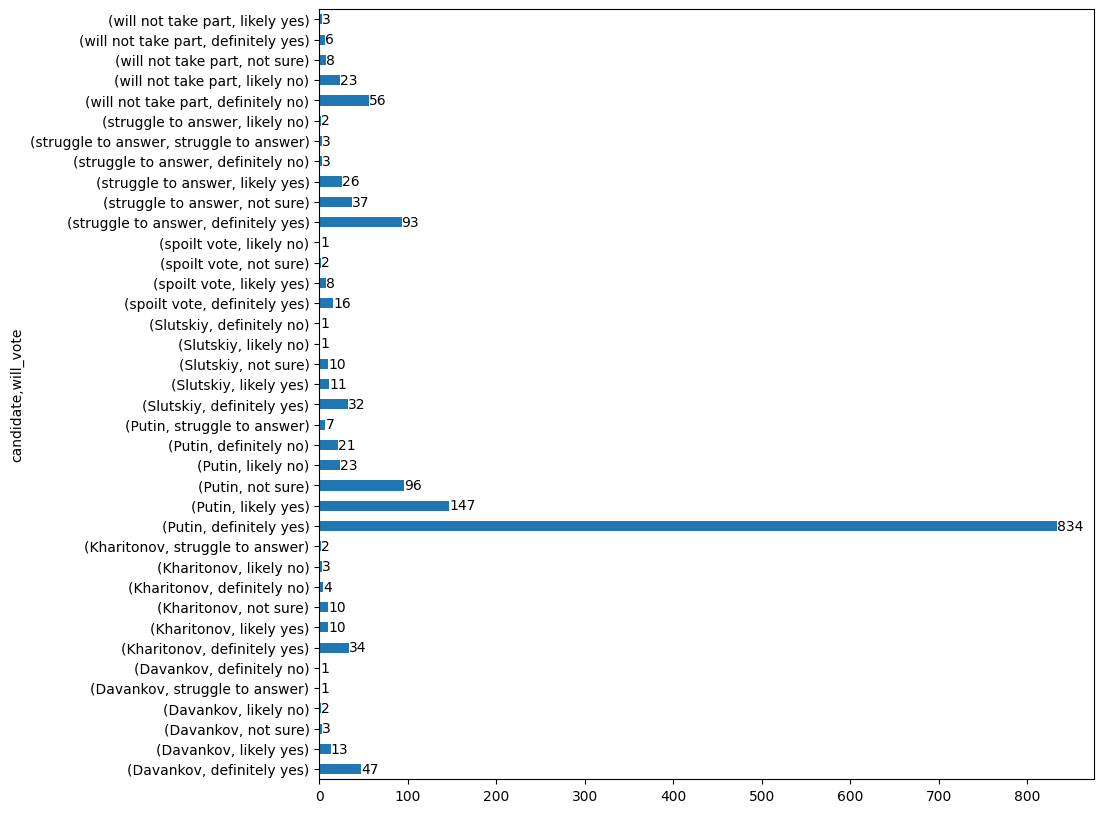

In [30]:
plt.figure(figsize=(10,10))
ax10 = dataset.groupby('candidate')['will_vote'].value_counts().plot.barh()

for bars in ax10.containers:
    ax10.bar_label(bars)
